In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import math

from lib.RadialBasisFunction import RBF

#### Load the datasets

In [2]:
linear_function_dataset = np.genfromtxt("data/linear_function_data.txt", dtype='double')
nonlinear_function_dataset = np.genfromtxt("data/nonlinear_function_data.txt", dtype='double')

#### Plot the datasets

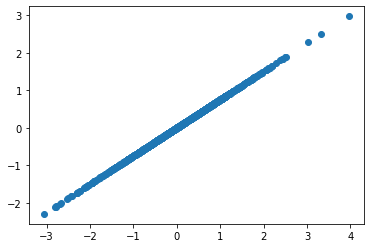

In [3]:
lf_x, lf_y = linear_function_dataset.T

plt.scatter(lf_x, lf_y)

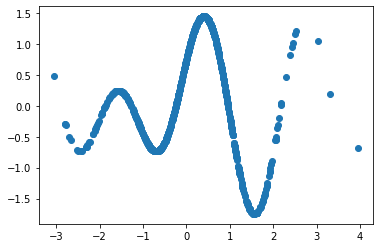

In [4]:
nlf_x, nlf_y = nonlinear_function_dataset.T
plt.scatter(nlf_x, nlf_y)

#### Part One and Two: linear approximation

In [5]:
def least_square(a,b):
    x = np.vstack([a, np.zeros(len(b))]).T
    return LA.lstsq(x, b, rcond=None)[0]

In [6]:
lf_m, lf_c = least_square(lf_x, lf_y)
nlf_m, nlf_c = least_square(nlf_x, nlf_y)

In [7]:
function_line_l = np.polyval([lf_m, lf_c], lf_x)
function_line_n = np.polyval([nlf_m, nlf_c], nlf_x)

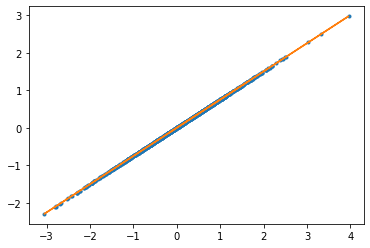

In [8]:
plt.plot(lf_x, lf_y, '.')
plt.plot(lf_x, function_line_l)

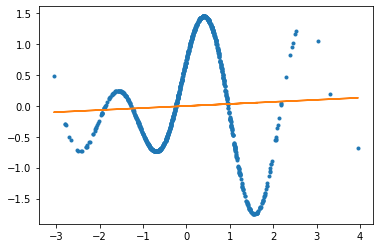

In [9]:
plt.plot(nlf_x, nlf_y, '.')
plt.plot(nlf_x, function_line_n)

#### Part three: non-linear approximation with radial basis functions

In [10]:
rbf = RBF(nlf_x,nlf_y,10,1,0.01,vector_field = False)
predicted = rbf.rbf(nlf_x.reshape(-1, 1))

phi = rbf.theta #While implementing rbf I thought that greek symbol was theta, but it is called phi -MG

#### Visualize the approximation

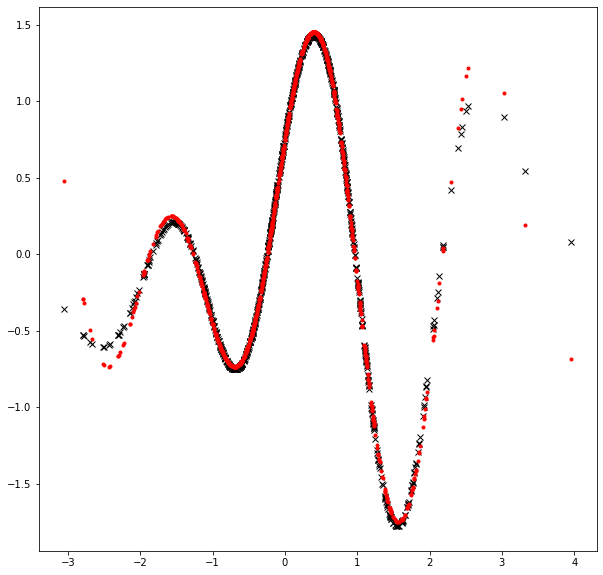

In [11]:
fig = plt.figure(figsize=(10,10))
plt.plot(nlf_x, predicted, 'xk')
plt.plot(nlf_x, nlf_y, '.r')

#### Visualize the radial basis functions

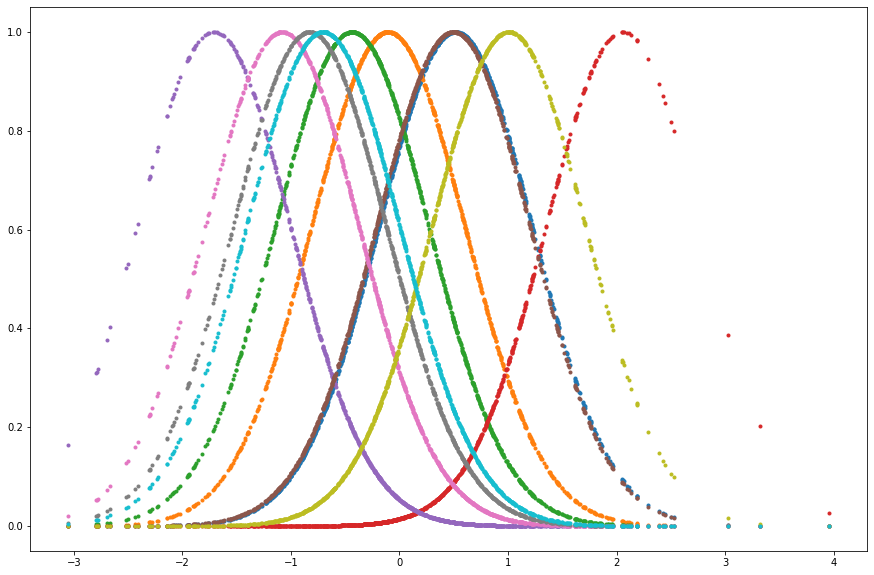

In [12]:
fig = plt.figure(figsize=(15,10))
plt.plot(nlf_x, phi, '.')

#### Non-linear approximation of the linear dataset

In [13]:
rbf = RBF(lf_x,lf_y,10,1,0.01,vector_field = False)
predicted = rbf.rbf(lf_x.reshape(-1, 1))

phi = rbf.theta #While implementing rbf I thought that greek symbol was theta, but it is called phi -MG

#### Visualize the approximation

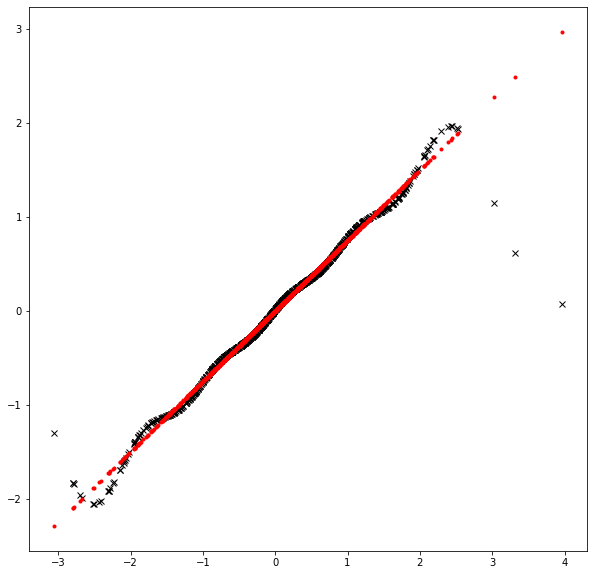

In [14]:
fig = plt.figure(figsize=(10,10))
plt.plot(lf_x, predicted, 'xk')
plt.plot(lf_x, lf_y, '.r')

Visualize the Radial basis functions

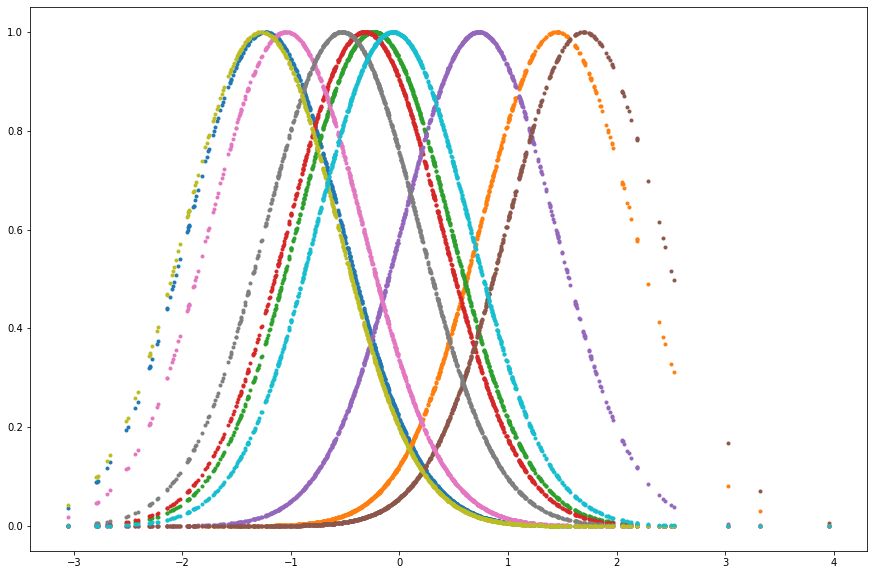

In [15]:
fig = plt.figure(figsize=(15,10))
plt.plot(nlf_x, phi, '.')